# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

<font color="blue"> Venkata Sai Santosh Ravi Teja Kancharla </font>

# Introduction

In this assignment we will implement "least mean squares" and "least squares" algorithms on a data set and predict data values. We will implement both the algorithms and test them on a single data set and compare the results. The observations will be recorded. We also analyze the performance of the two methods using some performance metrics. 

# Data


We use a regression data set for implementing the linear models in this assignment.

The following data set(Appliances energy prediction data set) describes the temperatures and humidities in various rooms of a house, located in an city in belgium and the energy consumtion of various appliances in the house. The data also presents the outside temperature and humidity which is derived from the nearest airport weather station. Two random variables have also been included in the data set for testing the regression models and to filter out the non predictive attributes. The data is collected for every 10 min over a period of 4.5 months. 

Attributes: date, applicances: denotes the energy usage of appliacnes in Whr, lights: energy usage of lights in Whr, Temperatures and humidty in various rooms, temperature and humidity outside, pressure, visibility, Temperature dew point and 2 random variables.

For this assignemnt, we wish to predict the values of T7, ie temperature in laundary room. To predict the values, we consider the dependency of the T7 on the attribute T_out, i.e the outside temperature. We train a model based on T_out to predict the values of T7. 

Note: Though the data set is aimed at appliances energy prediction, in this assignment, the appliances energy is not considered for testing the linear models.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The data set contains 19734 rows of data inputs, with 29 columns. The data is attached below.

In [3]:
data = pd.read_csv("energydata_complete.csv")
data

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00         430      50  20.133333  48.000000   
13     2016-01-11 19:10:00         250      40  20.260000  52.726667   
14     2016-01-11 19:20:00         100      10  20.426667  55.893333   
15     2016-01-11 19:30:00         100      10  20.566667  53.893333   
16     2016-01-11 19:40:00          90      10  20.730000  52.660000   
17     2016-01-11 19:50:00          70      30  20.856667  53.660000   
18     2016-01-11 20:00:00          80      30  20.890000  51.193333   
19     2016-01-11 20:10:00         140      40  20.890000  49.800000   
20     2016-01-11 20:20:00         120      20  20.890000  48.433333   
21     2016-01-11 20:30:00         190      40  20.963333  47.633333   
22     2016-01-11 20:40:00         110      40  21.033333  47.063333   
23     2016-01-11 20:50:00         110      40  21.100000  46.596667   
24     2016-01-11 21:00:00         110      30  21.133333  46.060000   
25     2016-01-11 21:10:00         110      20  21.200000  45.800000   
26     2016-01-11 21:20:00         100      30  21.290000  45.900000   
27     2016-01-11 21:30:00         100      20  21.356667  45.826667   
28     2016-01-11 21:40:00         100      20  21.390000  45.690000   
29     2016-01-11 21:50:00         100      20  21.500000  45.333333   
...                    ...         ...     ...        ...        ...   
19705  2016-05-27 13:10:00         280       0  25.033333  48.363333   
19706  2016-05-27 13:20:00         240       0  25.166667  48.156667   
19707  2016-05-27 13:30:00         250       0  25.323333  47.930000   
19708  2016-05-27 13:40:00         220       0  25.390000  47.656667   
19709  2016-05-27 13:50:00         230       0  25.500000  47.133333   
19710  2016-05-27 14:00:00         190      10  25.500000  47.060000   
19711  2016-05-27 14:10:00         160       0  25.600000  46.990000   
19712  2016-05-27 14:20:00          80       0  25.600000  46.730000   
19713  2016-05-27 14:30:00          60       0  25.566667  46.633333   
19714  2016-05-27 14:40:00          60       0  25.500000  46.360000   
19715  2016-05-27 14:50:00          60       0  25.500000  46.060000   
19716  2016-05-27 15:00:00          60       0  25.500000  45.933333   
19717  2016-05-27 15:10:00          70       0  25.500000  45.760000   
19718  2016-05-27 15:20:00          80       0  25.500000  45.626667   
19719  2016-05-27 15:30:00          80       0  25.500000  45.590000   
19720  2016-05-27 15:40:00          70       0  25.500000  45.522500   
19721  2016-05-27 15:50:00         100       0  25.500000  45.633333   
19722  2016-05-27 16:00:00         100       0  25.500000  45.730000   
19723  2016-05-27 16:10:00          90       0  25.500000  45.790000   
19724  2016-05-27 16:20:00         100       0  25.500000  45.933333   
19725  2016-05-27 16:30:00         220       0  25.426667  46.060000   
19726  2016-05-27 16:40:00         180       0  25.500000  46.530000   
19727  2016-05-27 16:50:00         120       0  25.500000  47.456667   
19728  2016-05-27 17:00:00         110       0  25.600000  47.

We first visualize the dependency of T7 on T_out, by plotting a graph for the values in those columns. T7 is given by x-axis, and T_out is given by y-axis. 

In [161]:
def data_plot():
    plt.plot(data.iloc[:, 15],data.iloc[:,21], '.')
    plt.xlabel(data.columns.values[15])
    plt.ylabel(data.columns.values[21])

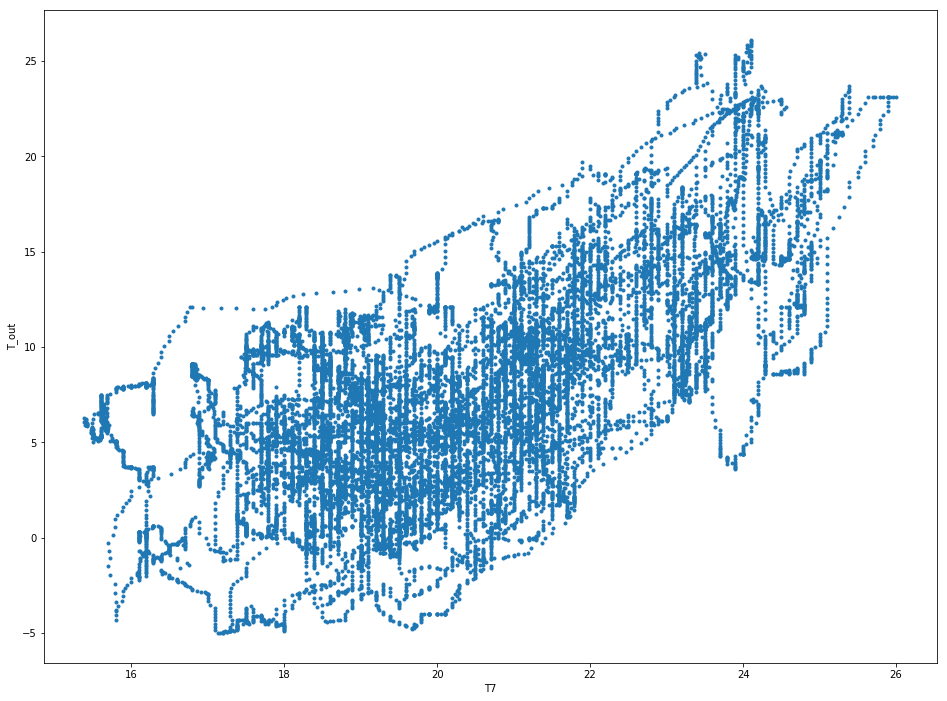

In [162]:
fig = plt.figure(figsize=(16,12))
data_plot()

We can initially observe that the temperatures in T7 are incresing as the temperatures outside, T_out are increasing. Though it is not a direct relation, i.e. there are many exceptions, like for some low temperatures outside, T7 is relatively higher, and for some high temperatures outside, T7 values are low. We cannot say that T7 is linearly dependent on T_out, i.e. T7 != c(T_out) for any constant c.    

Since, we consider only T7 and T_out, lets get the respective values into two arrays: X_data and Y_data.

In [168]:
X_data = np.array(data.iloc[:,21])
Y_data = np.array(data.iloc[:,15])
print("T_out:  ", X_data)
print("T7:     ", Y_data)

T_out:   [  6.6          6.48333333   6.36666667 ...,  22.46666667  22.33333333
  22.2       ]
T7:      [ 17.2   17.2   17.2  ...,  24.54  24.5   24.5 ]


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


A **linear model** is a approach to predict a relationship between a dependent variable y and an independent variable x. Considering, x, y as vectors and w as weight vector(also known as the coefficient vector), the linear model can be represented as :
$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

For regression data sets, the linear model is known as **linear regression model**, where a model f(x,w) generates the predicted values of y. 

A model fits the data correctly and predicts data when the error is very less. The error is calculated using a cost function which is sum of squares of the absolute difference between a predicted value and it's true value : 

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

Our aim will be to reduce the error to a maximum extent. This is done by choosing appropriate values for w (weight matrix). The value for w can be obtained by the following methods. 

### Least Squares Method

The best value for w will be at the local minimum of the graph between w and cost function. This is called gradient descent. The cost function is a quadratic function. To obtain the local minimum for the quadratic function, an appropriate method is to find the zero for it's derivative. Solving this condition, we can obtain the following equation: 

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
X^\top X w &= X^\top T\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$

### Least Mean Squares Method

We can observe that the least squares method considers all the available data for finding the best fit for the data. This can be computationally costly sometimes. To avoid this, least mean squares method is used. This method uses a technique called online learning, where each data point is introduced step by step and parameteres are calculated and updated at every step. Since, the gradient descent in this method is step by step, it is known as squential gradient descent. In this method, another parameter is also used, which is the learning rate. This defines how fast we can descend in the graph for finding local minimum. The step function for finding w is defined as: 

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

### Implementation

The above two methods are implemented in this assignement. For this, we take a super class called Base Model, which contains abstract methods : *train()* , to train a data set and *use()* to test the data set on the predicted model.

A class, LinearModel defined for implementing linear model based methods, with it's parent class as BaseModel. This model has new methods, *add_ones()*, to add the bias column(column of ones) and *check_matrix()*, to check whether a matrix has atleast 1 cloumn and one row. This class has an attribute called w, weight matrix, which is basically calculated inside the *train()* function. The train function accepts two parameters: X(input variable values array) and T(dependent/target variable values array)

We further define two classes, LinearRegress and LMS, one for each least squares method and least mean squares method. These two classes implement the abstract methods: train and use.

### Super Classs Definition

In [8]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [71]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = LinearModel.add_ones(self,X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T 
        ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        X = LinearModel.add_ones(self,X)
        y = X @ self.w
       # print(y)
        #plt.plot(y)
        return y
        ## pass  ## TODO: replace this with your codes

In the first line in *train()* and *use()*, we add the bias line for the X matrix. *train()* uses the above described equation to calculate the weight matrix w. The *use()* returns the array y(Nx1) with values predicted based on calculated w matrix. 

### Least Mean Squares

In [77]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    
    # batch training by using train_step function
    def train(self, X, T):
        #X = LinearModel.add_ones(self,X)
        #self.w = np.ones(X.shape[1])
        N = X.shape[0]
        for k in range(N): 
            self.train_step(X[k,:], T[k])
        pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = np.hstack(([1], x))
        if(self.w is None):
            #x = np.hstack(([1], x))
            self.w = np.zeros(x.shape[0])
        #print(x.shape)
        y = self.w@x    
        self.w -= self.alpha * (y - t) * x
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        X = LinearModel.add_ones(self,X)
        Y = X@self.w
        Y = np.array([Y]).T
        #print(Y.shape)
        return Y
        pass  ## TODO: replace this with your codes
        

In the first line in *train_step()* and *use()*, we add the bias line for the X matrix. Unlike previous method, in train_step() ones are added each time for each data point x(1d array). *train()* takes the X and T matrix and calls the *train_step()* function for each data point(each row in X) and it's respective y value from Y matrix. *train_step()* uses the above described step equation to calculate the weight matrix w. The *use()* returns the array y(Nx1) with values predicted based on calculated w matrix. 

### Usage Examples

In [81]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

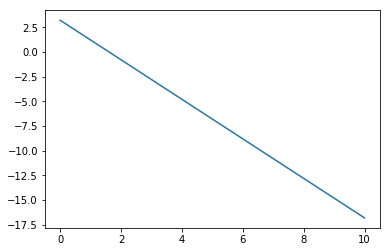

In [82]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

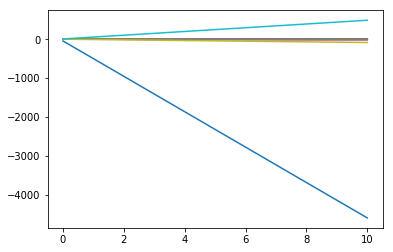

In [83]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

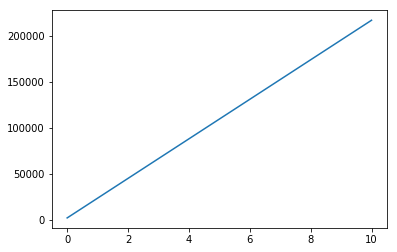

In [84]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

The two methods are applied on the data set and results are visualised.

First, lets consider Least squares method and apply it to the data. For better visualization of the results, we consider the first 10,000 data points in the data set and train the data. An object for LinearRegress class is created and *train()* is called upon that object. X_data[1:10000] and Y_data[1:10000] are sent as parameters for that function. It will calculate the weight matrix. Next, we store the return value of *use()* to a variable, which will be our required predicted values. Then, we plot these values along with the actual values to see how good fit are the predicted values.

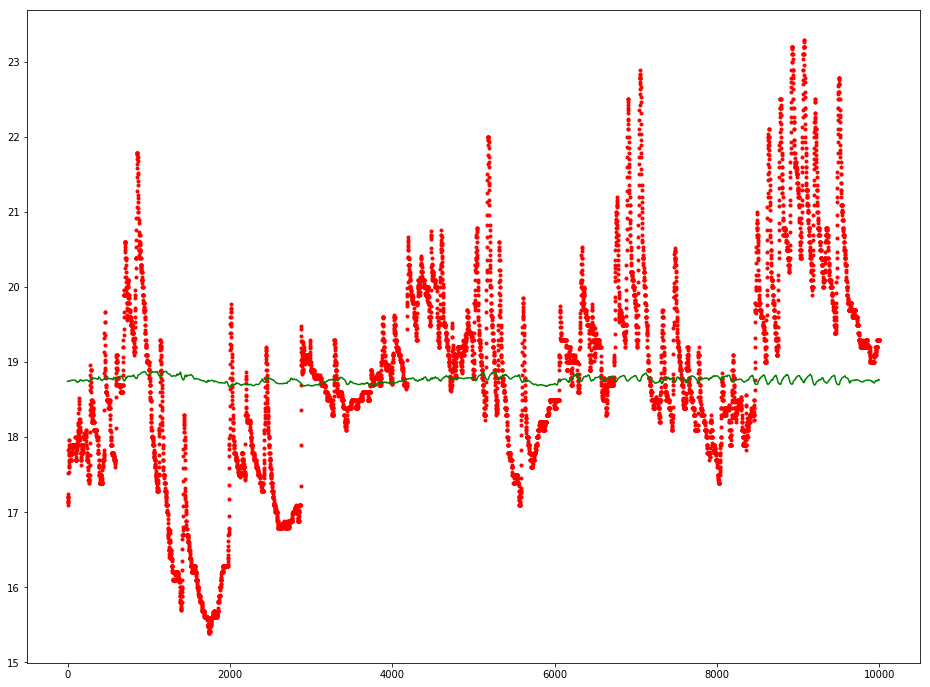

In [164]:
fig = plt.figure(figsize=(16,12))
ls= LinearRegress()
X1 = X_data.reshape((-1,1))
ls.train(X1[1:10000], Y_data[1:10000])
plt.plot(Y_data[1:10000], 'r.')
Y_pred1 = ls.use(X1[1:10000])
plt.plot(Y_pred1, 'g')

We plotted the Y array returned from the *use()* in the LinearRegress class. The green line represents the predicted values, while the red dots represent the actual values. 

For more clear visualization lets consider the first 100 data points and plot the graph. 

Note: considering the 100 data points will not produce the exact result of considering 10000 data points, but it can be used to analyse the performance of the method with less number of data points. 

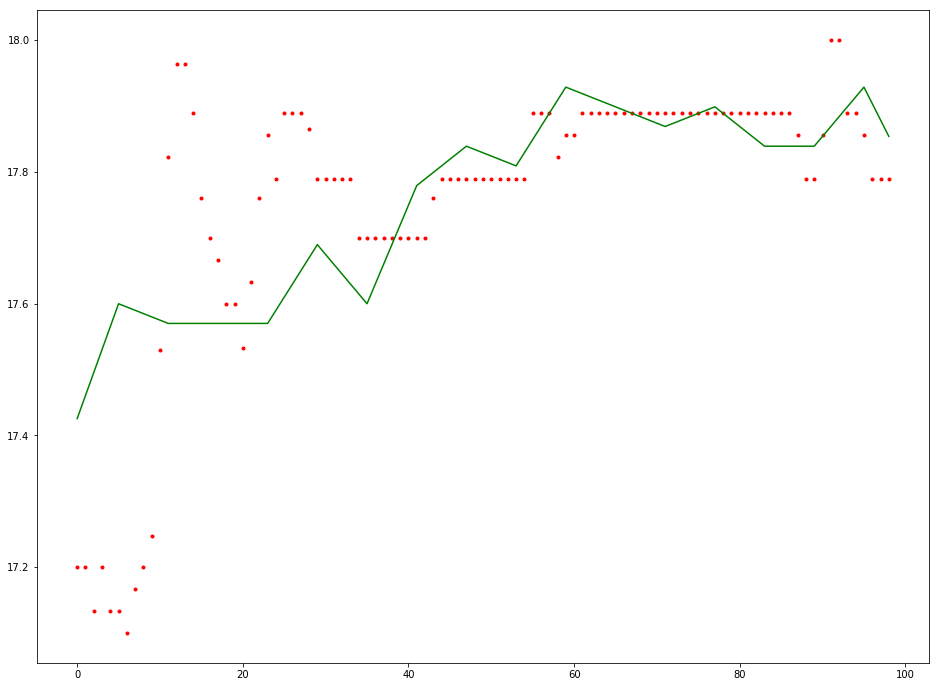

In [169]:
fig = plt.figure(figsize=(16,12))
ls.train(X1[1:100], Y_data[1:100])
plt.plot(Y_data[1:100], 'r.')
Y_pred1 = ls.use(X1[1:100])
plt.plot(Y_pred1, 'g')

We can observe that using least squares method, the predicted model fit to the data. We  may not know how accurately the data is predicted but the scattering of data points and the predicted line looks satisfactory.  

Now, let us apply the LMS method upon the data. Similar to the above method, we use an object for LMS class to call the train() and use() functions. Apart from that, we need to initialize the learning rate which we need to specify while creating the object. Here, lets consider learning rate = 0.015 and visualize the results. 

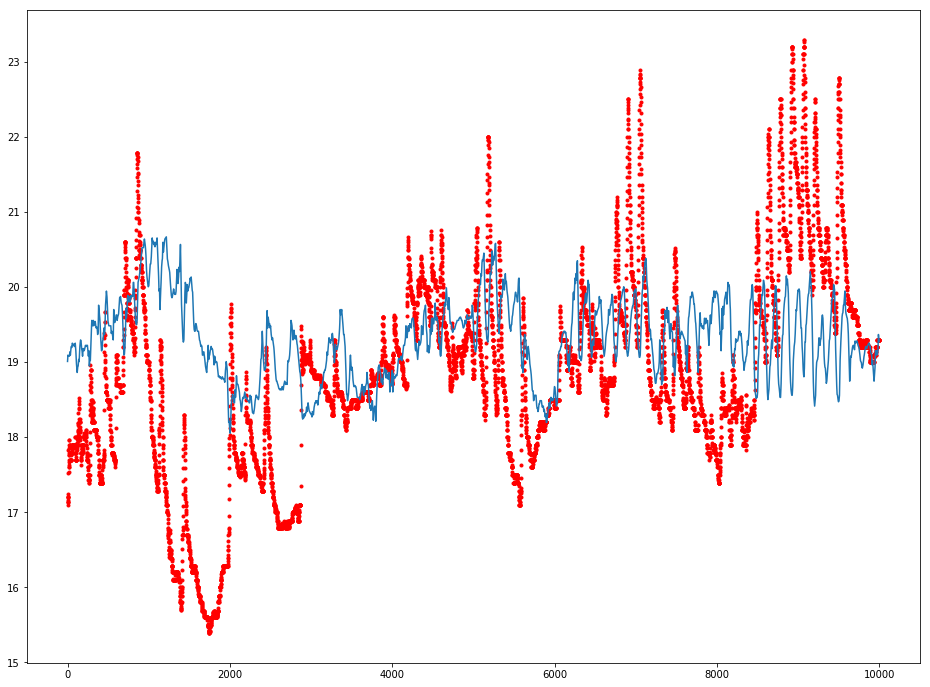

In [170]:
fig = plt.figure(figsize=(16,12))
lms= LMS(0.015)
lms.train(X1[1:10000], Y_data[1:10000])
plt.plot(Y_data[1:10000], 'r.')
Y_pred2 = lms.use(X1[1:10000])
plt.plot(Y_pred2)

For the same data, lets reduce the learning rate to 0.005 and visualise the results.

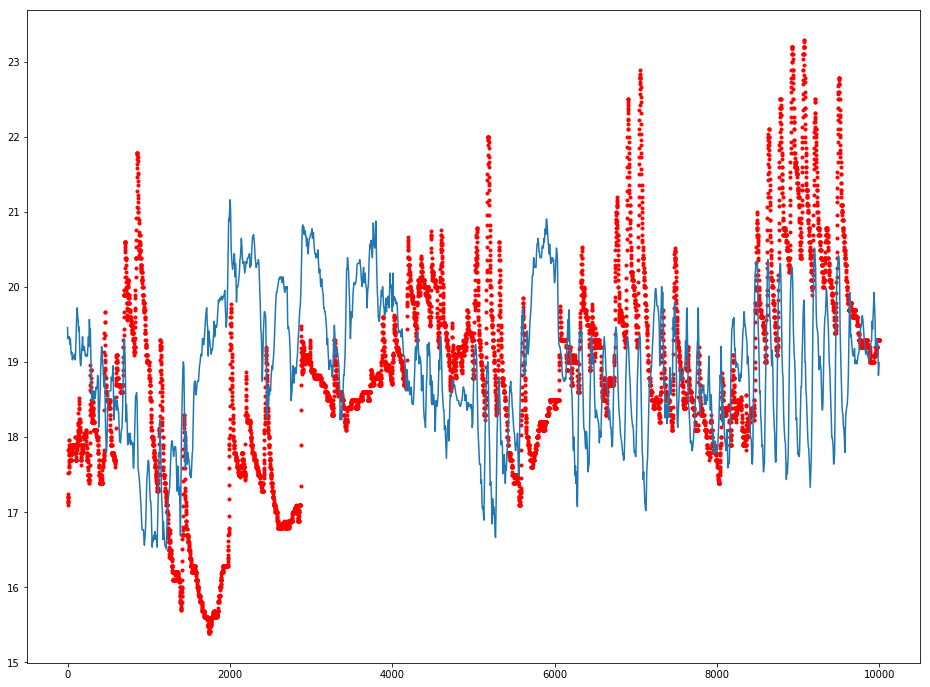

In [178]:
fig = plt.figure(figsize=(16,12))
lms2= LMS(0.001)
lms2.train(X1[1:10000], Y_data[1:10000])
plt.plot(Y_data[1:10000], 'r.')
Y_pred2 = lms2.use(X1[1:10000])
plt.plot(Y_pred2)

Again, for better visualization of the results, lets consider the first 100 data points and plot the results.

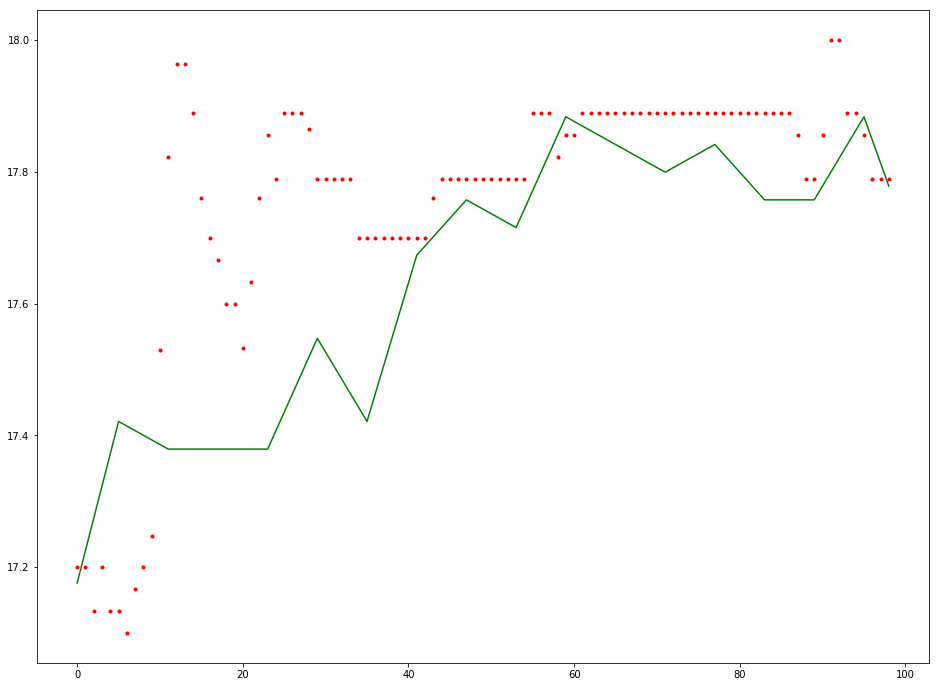

In [179]:
fig = plt.figure(figsize=(16,12))
lms.train(X1[1:100], Y_data[1:100])
plt.plot(Y_data[1:100], 'r.')
Y_pred1 = lms.use(X1[1:100])
plt.plot(Y_pred1, 'g')

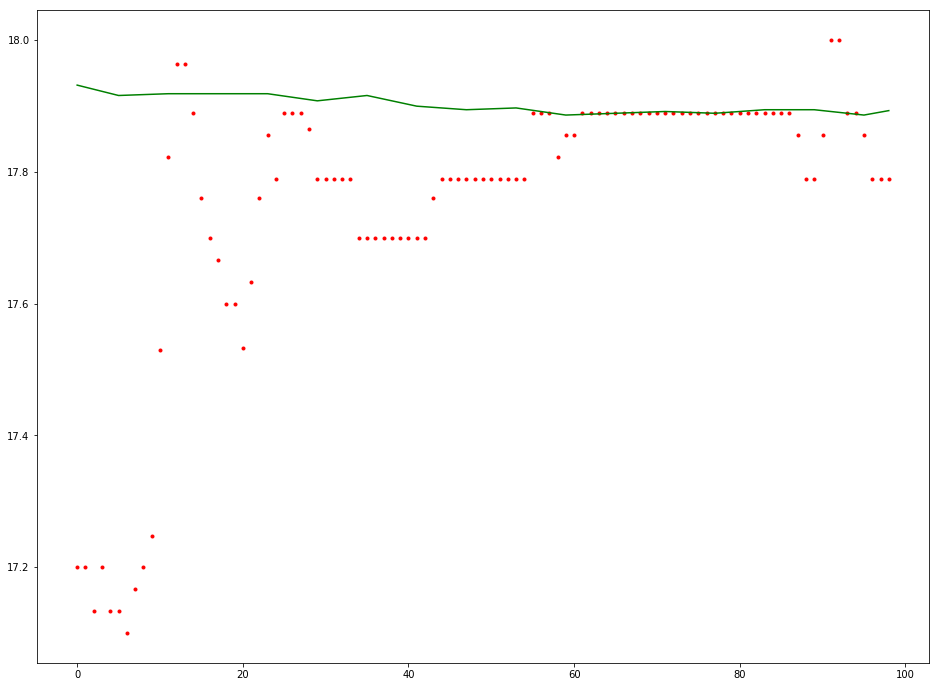

In [180]:
fig = plt.figure(figsize=(16,12))
lms2.train(X1[1:100], Y_data[1:100])
plt.plot(Y_data[1:100], 'r.')
Y_pred1 = lms2.use(X1[1:100])
plt.plot(Y_pred1, 'g')

We can observe that the learning rate is very low in the second case(alpha = 0.001), for the model to fit the data appropriately. Where as, when alpha = 0.015, the predicted values looks to be fit good with the true values of data. We can even see that, LMS with alpha = 0.015, fits data better that least squared method which we saw above. 

## Analysis of methods

Until now we have observed the results for the methods implemented on the data sets. Now lets analyse the performance of the methods. For the analysis, we first considered **mean squared error**, which sums the square of difference of true target values and predicted values and is divided by the number of samples. This is considered a good method for analysing the performance of a linear regression methods. 

We defined a method mse() which takes the True values array, Predicted values error and number of samples as the parameters and returns the mse value. We considered the metrics for both 10000 samples and 100 samples.

In [187]:
#  Mean squared error
def mse(T, Y, N):
    return np.sum((T-Y)**2)/N

#  for 10000 samples
err1 = mse(Y_data[1:10000], Y_pred1, 10000)
err2 = mse(Y_data[1:10000], Y_pred2, 10000)
print("LS:  ",err1,"|  LMS:  ",err2)

LS:   252.561865885 |  LMS:   27133.1518871


In [184]:
#  for 100 samples
err1 = mse(Y_data[1:100], Y_pred1, 100)
err2 = mse(Y_data[1:100], Y_pred2, 100)
print("LS:  ",err1,"|  LMS:  ",err2)

6.69223214004 22882.1803494


It can be observed that, the mse value for the least squared method is less when compared to the Least mean squared method. The difference of errors is less in the former, by which we can say that it is a better fit for the given data. 

RMSE(Root mean squared error) is generally considered more than mse, in which the root of the sum of the squared errors is considered. Though RMSE and MSE's analysis is same, but the former is considered better because the value produced by it is similar in units with the target values, which will be helpful to compare the value better with the target or predicted values.

Here, we created a method called rmse(), which takes in the same parameters as mse() and returns the rmse value. 

In [188]:
#  root mean squared error
def rmse(T, Y, N):
    return np.sqrt(np.sum((T-Y)**2))/N

#  for 10000 samples
err1 = rmse(Y_data[1:10000], Y_pred1, 10000)
err2 = rmse(Y_data[1:10000], Y_pred2, 10000)
print("LS:  ",err1,"|  LMS:  ",err2)

LS:   0.158921951248 |  LMS:   1.64721437242


In [189]:
#  For 100 samples
err1 = rmse(Y_data[1:100], Y_pred1, 100)
err2 = rmse(Y_data[1:100], Y_pred2, 100)
print("LS:  ",err1,"|  LMS:  ",err2)

LS:   0.258693489289 |  LMS:   15.1268570263


Here also we can observe that the rmse value of LS is less than that of LMS. From which we can say that LS method produces values of w array which are better fit for our data compared to LMS. 

However, RMSE/MSE can give us flawed results when the difference is very high for some data points. This is because of the fact that it squares the error, which increases the magnitude of the error. Hence, the above both methods are sometimes not considered to give good analysis at times. 

For that reason, we can consider **mean absolute error** analysis which doesn't square the errors, but just sums the error values for each data point and predicted value. Here, we defined a function called mae(), which takes 3 parameters, same as above functions. But it doesn' squares the error values but just sums then and then the value is divided by the number of samples and the result is returned.  

In [190]:
#  Mean absolute error 
def mae(T, Y, N):
    return np.sum(np.abs(T-Y))/N

#  for 10000 samples
err1 = mae(Y_data[1:10000], Y_pred1, 10000)
err2 = mae(Y_data[1:10000], Y_pred2, 10000)
print("LS:  ",err1,"|  LMS:  ",err2)

LS:   125.468301197 |  LMS:   12930.8970106


The observations here doesn't change our thoughts which we gained from previous observations. Here also, LS looks to provide less error when compared to LMS. 

## Conclusions

Two methods for finding appropriate weight matrices in Linear model: Least squares and Least mean squares, are implemented and tested against a data set, to predict the temperature in laundry room of a house based on the temperature outside. The results are visualized and observations are made. From the graphs plotted, we observed(for 100 samples), LMS fits better compared to LS, but when we analysed the performance of these methods uisng some metrics like MSE, RMSE and MAE, we observed that the error in LS is less than that of LMS. 

The assignment provided me a good hands on experiance in implementing linear model for regression data. I found it challenging to give an object oriented model for the known methods, which I earlier implemented as methods. I struggled a little at the part in LMS, where we need to assign bias column for the X array. The priliminary test worked as good tool for me to test the proper working of my code. I also learnt about the metrics for analysing linear regression models, like RMSE, MEA etc. 

# References

- Course material for the class ITCS 6156/8156
- Sample data: http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction
- "Hands-On Machine Learning with Scikit-Learn & TensorFlow" - Aurelien Geron
- https://en.wikipedia.org/wiki/Mean_absolute_error
- https://en.wikipedia.org/wiki/Root-mean-square_deviation


# Extra Credit

If you want to work more for an extra credit, place your work here about weight analysis. 
Try to answer to the question: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? 
    
    

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

In [87]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
